In [29]:
print("test")

test


In [30]:
%pip install biopython

In [72]:
from Bio.Seq import Seq

sequence_x = Seq('AGTGACTGAGCAGGCAGCATGTGTCGACGATCGAGTGACTGAGCAGGCAGCATGTGTCGACGATCG')
sequence_y = Seq('CTCGATCGTGTCACTGCACTCGATCGTAGCTAGCTAGCTCGATCGTAGCTGTCGATCGTAGCTAGC')

print(len(sequence_x))
print(len(sequence_y))

# finding CGC

print(sequence_x.find('CGC'))
print(sequence_y.find('CGC'))

partX = sequence_x[:10] + sequence_x[-5:]
partY = sequence_y[:20] + sequence_y[-3:]

# Join

combined = partX + partY
print(combined)

# Reversed
sequence_z = combined[::-1]

print(sequence_z)

66
66
-1
-1
AGTGACTGAGGATCGCTCGATCGTGTCACTGCACTAGC
CGATCACGTCACTGTGCTAGCTCGCTAGGAGTCAGTGA


Counter({'G': 11, 'C': 10, 'T': 9, 'A': 8})
8
10


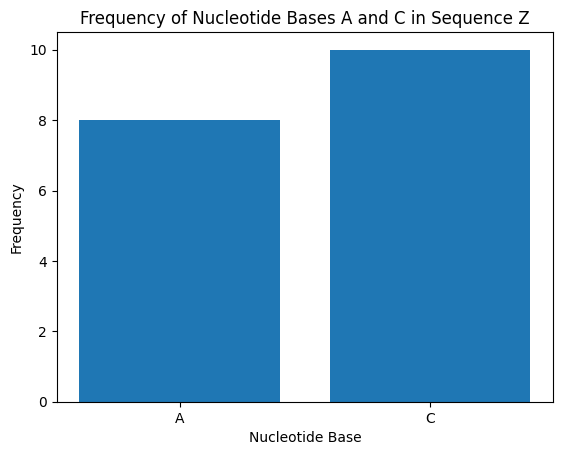

In [73]:
from collections import Counter
result = Counter(sequence_z)
print(result)

# plt.bar(result.keys(), result.values())
# plt.show

from matplotlib import pyplot as plt
a_count = sequence_z.count('A')
c_count = sequence_z.count('C')

print(a_count)
print(c_count)


plt.bar(['A', 'C'], [a_count, c_count])
plt.xlabel('Nucleotide Base')
plt.ylabel('Frequency')
plt.title('Frequency of Nucleotide Bases A and C in Sequence Z')
plt.show()





In [27]:
%pip install matplotlib

     ---------------------------------------- 0.0/165.5 kB ? eta -:--:--
     -- ------------------------------------- 10.2/165.5 kB ? eta -:--:--
     ------ ------------------------------ 30.7/165.5 kB 435.7 kB/s eta 0:00:01
     ------ ------------------------------ 30.7/165.5 kB 435.7 kB/s eta 0:00:01
     ------ ------------------------------ 30.7/165.5 kB 435.7 kB/s eta 0:00:01
     --------- --------------------------- 41.0/165.5 kB 178.6 kB/s eta 0:00:01
     ------------------ ------------------ 81.9/165.5 kB 305.0 kB/s eta 0:00:01
     -------------------- ---------------- 92.2/165.5 kB 308.0 kB/s eta 0:00:01
     ------------------------ ----------- 112.6/165.5 kB 344.8 kB/s eta 0:00:01
     ---------------------------- ------- 133.1/165.5 kB 327.7 kB/s eta 0:00:01
     ------------------------------------ 165.5/165.5 kB 367.9 kB/s eta 0:00:00
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
    --------------------------------------- 0.1/8.0 MB 2.2 MB/s 

In [74]:
# GC AT CONTENT
def gc_percentage(sequence_z):
    g = sequence_z.count('G')
    c = sequence_z.count('C')
    length = len(sequence_z)
    # print(g)
    # print(c)
    # print(length)
    return(g+c)/ length * 100

print(gc_percentage(sequence_z))
print(100-gc_percentage(sequence_z))

55.26315789473685
44.73684210526315


In [75]:
# melting temp

from Bio.SeqUtils import MeltingTemp as MT
# WALLACE
print(MT.Tm_Wallace(sequence_z))

# GC CONTENT
print(MT.Tm_GC(sequence_z))

# NEAREST NEIGHBOUR
print(MT.Tm_NN(sequence_z))


# MOLECULAR WEIGHT
from Bio.SeqUtils import molecular_weight as MW
print(MW(sequence_z))

118.0
66.7713231246095
68.06402650901367
11774.489


In [76]:
# TRANSCRIBE DNA -> RNA
RNA = sequence_z.transcribe()
print(RNA)

# TRANSLATE
print(RNA.translate())
# BISA JUGA DARI DNA NYA LGSG
print(sequence_z.translate()) #bisa ada warning klo dari sequencenya lgsg

# COMPLEMENT
print(sequence_z.complement())

CGAUCACGUCACUGUGCUAGCUCGCUAGGAGUCAGUGA
RSRHCASSLGVS
RSRHCASSLGVS
GCTAGTGCAGTGACACGATCGAGCGATCCTCAGTCACT


c:\Users\rapha\AppData\Local\Programs\Python\Python312\Lib\site-packages\Bio\Seq.py:2880: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  warnings.warn(


In [77]:
# SEQUENCE ALIGNMENT
from Bio import pairwise2
from Bio.pairwise2 import format_alignment

# LOCAL ALIGNMENT
local_align = pairwise2.align.localxx(sequence_x, sequence_y, one_alignment_only = True)
for i in local_align:
    print(format_alignment(*i))

global_align = pairwise2.align.globalxx(sequence_y, sequence_z, one_alignment_only = True)
for i in global_align:
    print(format_alignment(*i))

6 CTGAGCAGGCAGCAT-GTGTCGAC-G-A-TCGAGTGACTG-AGC-AGGC-AGC---AT-GT-G-T--CGA-CGAT--C--G
  ||       | | || ||||| || | | |||| |  | | ||| | || |||   || || | |  ||| || |  |  |
1 CT-------C-G-ATCGTGTC-ACTGCACTCGA-T--C-GTAGCTA-GCTAGCTCGATCGTAGCTGTCGATCG-TAGCTAG
  Score=45

CTCGATCGTGTCACTGCACTCGATCGTAGCTAGCTAGCTCGATCGTAGCTGTCGATCGT-AGCTAGC-
  |||     |||| |   || | | | | | |||||||||  | ||   |  ||  || || | |  
--CGA-----TCAC-G---TC-A-C-T-G-T-GCTAGCTCG--C-TA---G--GA--GTCAG-T-G-A
  Score=36



In [63]:
%pip install python-Levenshtein


   ---------------------------------------- 0.0/98.6 kB ? eta -:--:--
   ---- ----------------------------------- 10.2/98.6 kB ? eta -:--:--
   ---- ----------------------------------- 10.2/98.6 kB ? eta -:--:--
   ------------ --------------------------- 30.7/98.6 kB 262.6 kB/s eta 0:00:01
   ------------ --------------------------- 30.7/98.6 kB 262.6 kB/s eta 0:00:01
   ------------ --------------------------- 30.7/98.6 kB 262.6 kB/s eta 0:00:01
   ------------------------ --------------- 61.4/98.6 kB 204.8 kB/s eta 0:00:01
   ------------------------ --------------- 61.4/98.6 kB 204.8 kB/s eta 0:00:01
   ---------------------------------------- 98.6/98.6 kB 256.8 kB/s eta 0:00:00
   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
    --------------------------------------- 0.0/1.6 MB 991.0 kB/s eta 0:00:02
   -- ------------------------------------- 0.1/1.6 MB 1.3 MB/s eta 0:00:02
   -- ------------------------------------- 0.1/1.6 MB 1.3 MB/s eta 0:00:02
   -- --

In [78]:
# HAMMING DAN LEVENHSTEIN
def hamming(seq1, seq2):
    effort = 0
    for x,y in zip(seq1, seq2):
        if(x != y):
            effort += 1
    return effort
print(hamming(sequence_x, sequence_y))

# levenshtein distance
from Levenshtein import distance
print(distance(sequence_x, sequence_y))


49
34


In [79]:
def plotting(seq1, seq2):
    print(' |' + seq2)
    print('-'*(len(seq2)+2))
    for i in seq1:
        print(i + '|', end='')
        for j in seq2:
            if(i==j):
                print('X', end='')
            else:
                print(' ', end='')
        print()
plotting(sequence_x, sequence_y)

 |CTCGATCGTGTCACTGCACTCGATCGTAGCTAGCTAGCTCGATCGTAGCTGTCGATCGTAGCTAGC
--------------------------------------------------------------------
A|    X       X    X    X    X   X   X     X    X       X    X   X  
G|   X   X X     X     X   X  X   X   X   X   X  X  X  X   X  X   X 
T| X   X  X X   X    X   X  X   X   X   X   X  X   X X   X  X   X   
G|   X   X X     X     X   X  X   X   X   X   X  X  X  X   X  X   X 
A|    X       X    X    X    X   X   X     X    X       X    X   X  
C|X X   X    X X  X X X   X    X   X   X X   X    X   X   X    X   X
T| X   X  X X   X    X   X  X   X   X   X   X  X   X X   X  X   X   
G|   X   X X     X     X   X  X   X   X   X   X  X  X  X   X  X   X 
A|    X       X    X    X    X   X   X     X    X       X    X   X  
G|   X   X X     X     X   X  X   X   X   X   X  X  X  X   X  X   X 
C|X X   X    X X  X X X   X    X   X   X X   X    X   X   X    X   X
A|    X       X    X    X    X   X   X     X    X       X    X   X  
G|   X   X X     X     X   X  X   

In [80]:
from Bio import SeqIO
fastaFileX = SeqIO.read('x.fasta', 'fasta')
fastaFileY= SeqIO.read('y.fasta', 'fasta')

print(fastaFileX)
print(fastaFileX.seq)
print(fastaFileY.seq)

ID: seqX
Name: seqX
Description: seqX Description of Sequence X
Number of features: 0
Seq('AGTGACTGAGCAGGCAGCATGTGTCGACGATCGAGTGACTGAGCAGGCAGCATG...TCG')
AGTGACTGAGCAGGCAGCATGTGTCGACGATCGAGTGACTGAGCAGGCAGCATGTGTCGACGATCG
CTCGATCGTGTCACTGCACTCGATCGTAGCTAGCTAGCTCGATCGTAGCTGTCGATCGTAGCTAGC
